<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [35]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
nyc_cov = pd.read_csv('COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv')

## Display top 7 rows of the dataframe in your notebook

In [4]:
#making the column have lowercase so it's easier to be accessed 
nyc_cov.columns = map(str.lower, nyc_cov.columns)
nyc_cov.head(7)

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,...,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,03/05/2020,3,0,14,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,03/06/2020,8,0,8,0,0,3,3,5,0,...,0,1,0,0,0,0,0,0,0,0


## Count number of null values (if any) for each column

In [5]:
nyc_cov.isna().sum()

date_of_interest                  0
case_count                        0
probable_case_count               0
hospitalized_count                0
death_count                       0
                                 ..
si_all_case_count_7day_avg        0
si_hospitalized_count_7day_avg    0
si_death_count_7day_avg           0
si_all_death_count_7day_avg       0
incomplete                        0
Length: 62, dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [6]:
nyc_cov = nyc_cov[['date_of_interest','case_count','death_count']]
nyc_cov.head()

,date_of_interest,case_count,death_count
0,02/29/2020,1,0
1,03/01/2020,0,0
2,03/02/2020,0,0
3,03/03/2020,1,0
4,03/04/2020,5,0


## Display the average, median, and standard deviation of each of your numerical columns

In [7]:
nyc_cov.describe()

,case_count,death_count
count,613.000000,613.000000
mean,1500.500816,47.982055
std,1468.301894,97.705563
min,0.000000,0.000000
25%,363.000000,6.000000
50%,940.000000,13.000000
75%,2241.000000,48.000000
max,6589.000000,598.000000


## Plot two of the numerical columns one against the other in a scatter plot

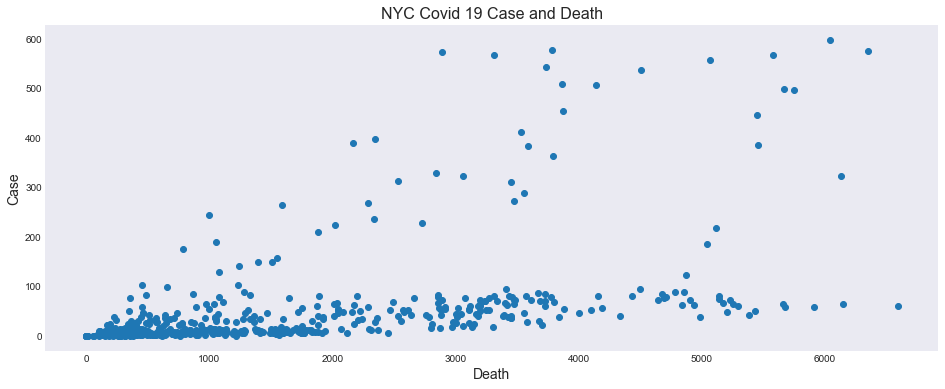

In [8]:
case_count = nyc_cov['case_count']
death_count = nyc_cov['death_count']
plt.figure(figsize=(16,6))
plt.scatter(x=case_count,y=death_count)
plt.title('NYC Covid 19 Case and Death', fontdict={'fontsize':16})
plt.ylabel('Case', fontdict={'fontsize':14})
plt.xlabel('Death', fontdict={'fontsize':14})
plt.show()

## Plot the data distribution of all your numerical columns in histogram and boxplot

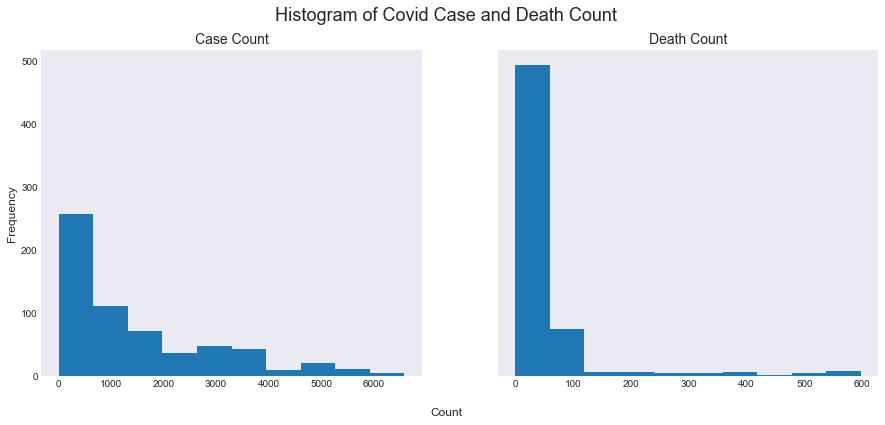

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True, figsize=(15,6))
fig.suptitle('Histogram of Covid Case and Death Count',size = 18)
fig.text(0.5, 0.04, 'Count', ha='center', va='center', size = 12)
ax1.hist(case_count)
ax1.set_title('Case Count',size = 14)
ax1.set_ylabel('Frequency',size = 12)
ax2.hist(death_count)
ax2.set_title('Death Count',size = 14)
plt.show()

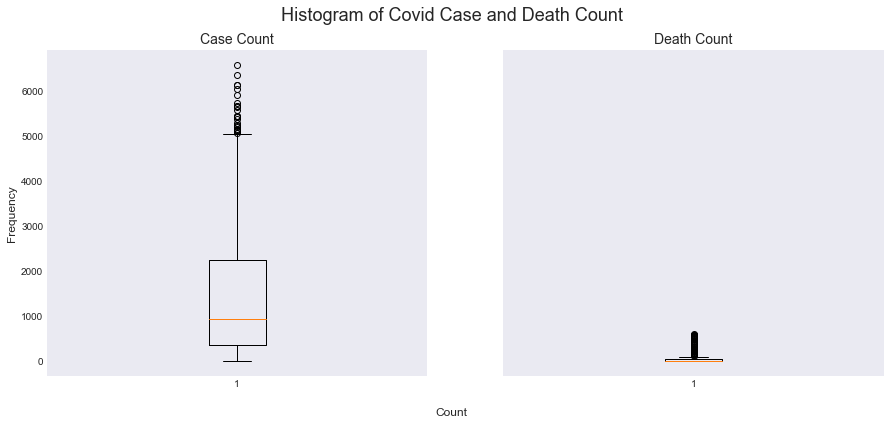

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True, figsize=(15,6))
fig.suptitle('Histogram of Covid Case and Death Count',size = 18)
fig.text(0.5, 0.04, 'Count', ha='center', va='center', size = 12)
ax1.boxplot(case_count)
ax1.set_title('Case Count',size = 14)
ax1.set_ylabel('Frequency',size = 12)
ax2.boxplot(death_count)
ax2.set_title('Death Count',size = 14)
plt.show()

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [11]:
nyc_cov['Power_of_case'] = np.power((nyc_cov['case_count']),2)
nyc_cov['Power_of_death'] = np.power((nyc_cov['death_count']),2)
nyc_cov.head()

,date_of_interest,case_count,death_count,Power_of_case,Power_of_death
0,02/29/2020,1,0,1,0
1,03/01/2020,0,0,0,0
2,03/02/2020,0,0,0,0
3,03/03/2020,1,0,1,0
4,03/04/2020,5,0,25,0


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [12]:
citibike =  pd.read_csv('201709-citibike-tripdata.csv')

## Count the number of missing values of each column

In [13]:
citibike.isna().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

In [14]:
citibike.dropna(inplace=True)

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [15]:
#create age columns 
citibike['age'] = 2021 - citibike['birth year']
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,34.0


In [16]:
#decoding gender value and dropping unknown gender value
citibike = citibike[citibike.gender != 0]
citibike['gender'].replace([1,2],['male','female'],inplace=True)
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,male,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,male,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,male,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,male,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,male,34.0


In [17]:
#showing range of user age and sum of it
citibike['age'].value_counts().sort_index()

20.0      1020
21.0      3037
22.0      5193
23.0      9549
24.0     12937
         ...  
132.0        3
133.0        4
134.0        8
135.0        5
136.0        1
Name: age, Length: 97, dtype: int64

In [18]:
def label_age (row):
   if row['age'] < 65 :
      return 'Adults'
   else :
      return 'Seniors'
   return 'Other'

In [19]:
#dropping user who's older than 100 years old and creating a new age class
citibike.drop(citibike[citibike.age >= 100].index, inplace=True)
citibike['age_class'] = citibike.apply (lambda row: label_age(row), axis=1)
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,age_class
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,male,28.0,Adults
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,male,33.0,Adults
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,male,52.0,Adults
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,male,28.0,Adults
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,male,34.0,Adults


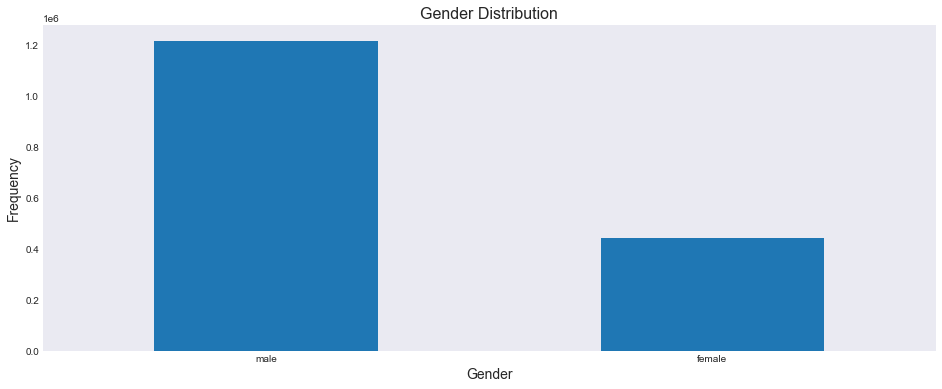

In [20]:
plt.figure(figsize=(16,6))
citibike['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution', fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':14})
plt.xlabel('Gender', fontdict={'fontsize':14})
plt.xticks(rotation=0)
plt.show()

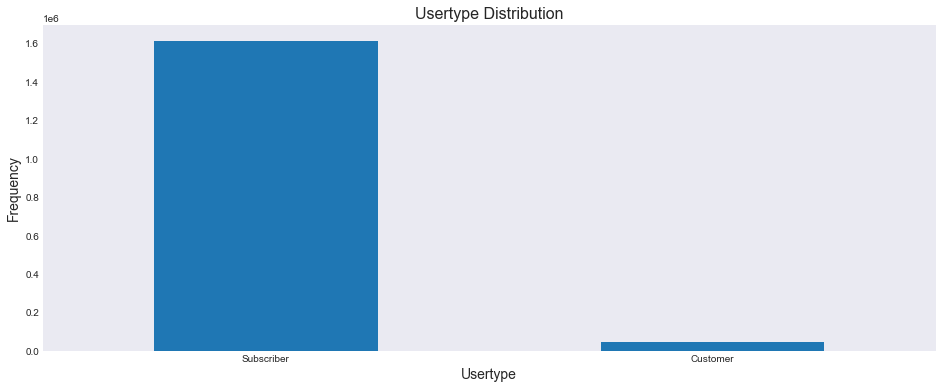

In [21]:
plt.figure(figsize=(16,6))
citibike['usertype'].value_counts().plot(kind='bar')
plt.title('Usertype Distribution', fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':14})
plt.xlabel('Usertype', fontdict={'fontsize':14})
plt.xticks(rotation=0)
plt.show()

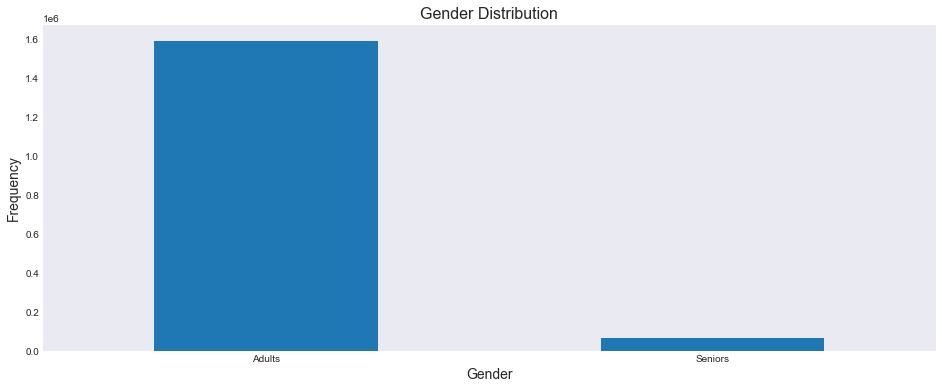

In [22]:
plt.figure(figsize=(16,6))
citibike['age_class'].value_counts().plot(kind='bar')
plt.title('Gender Distribution', fontdict={'fontsize':16})
plt.ylabel('Frequency', fontdict={'fontsize':14})
plt.xlabel('Gender', fontdict={'fontsize':14})
plt.xticks(rotation=0)
plt.show()

## What is the average number of trips per day?

In [45]:
start = pd.to_datetime(citibike.starttime)
stop = pd.to_datetime(citibike.stoptime)
diff = stop - start
duration_in_s = diff.total_seconds()
minutes = divmod(duration_in_s, 60)[0]
minutes

AttributeError: 'Series' object has no attribute 'total_seconds'

## What is the average trip duration?

In [28]:
duration = round((citibike.tripduration.mean() / 60), 2)
print(str(duration)+ ' minutes')

14.99 minutes


## What days of the week are most rides taken on?
Process the data and plot your answer

## What hour of the day are most rides taken on?
Process the data and plot your answer

## Is there correlation between age and trip duration?

## What are the top 10 pair of stations that our riders use as a start & stopping point?

## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



## Work with your dataset and show your findings to help answer your question

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```